In [5]:
import numpy as np
import segyio
import matplotlib.pyplot  as plt
plt.rcParams.update({'font.size': 28})

# Data Load with segyio

In [6]:
# Load a data for SEG-Y validation
path = "SEGY/50MHz/50MHz_line0.sgy"

# Open the data using segyio
# https://segyio.readthedocs.io/en/latest/index.html
s=segyio.open(path, ignore_geometry= True)

In [7]:
# init the data matrix as ndarray with [# traces, # time sample]
data_50=np.zeros([s.trace.length, s.trace.shape])

# fill the matrix with values for each trace
for i in range(s.trace.length):
    data_50[i, :] = s.trace[i]

print("Total number of traces: ", s.trace.length)
print("Total number of time samples: ", s.trace.shape)

Total number of traces:  25921
Total number of time samples:  425


# Plot Unsorted data

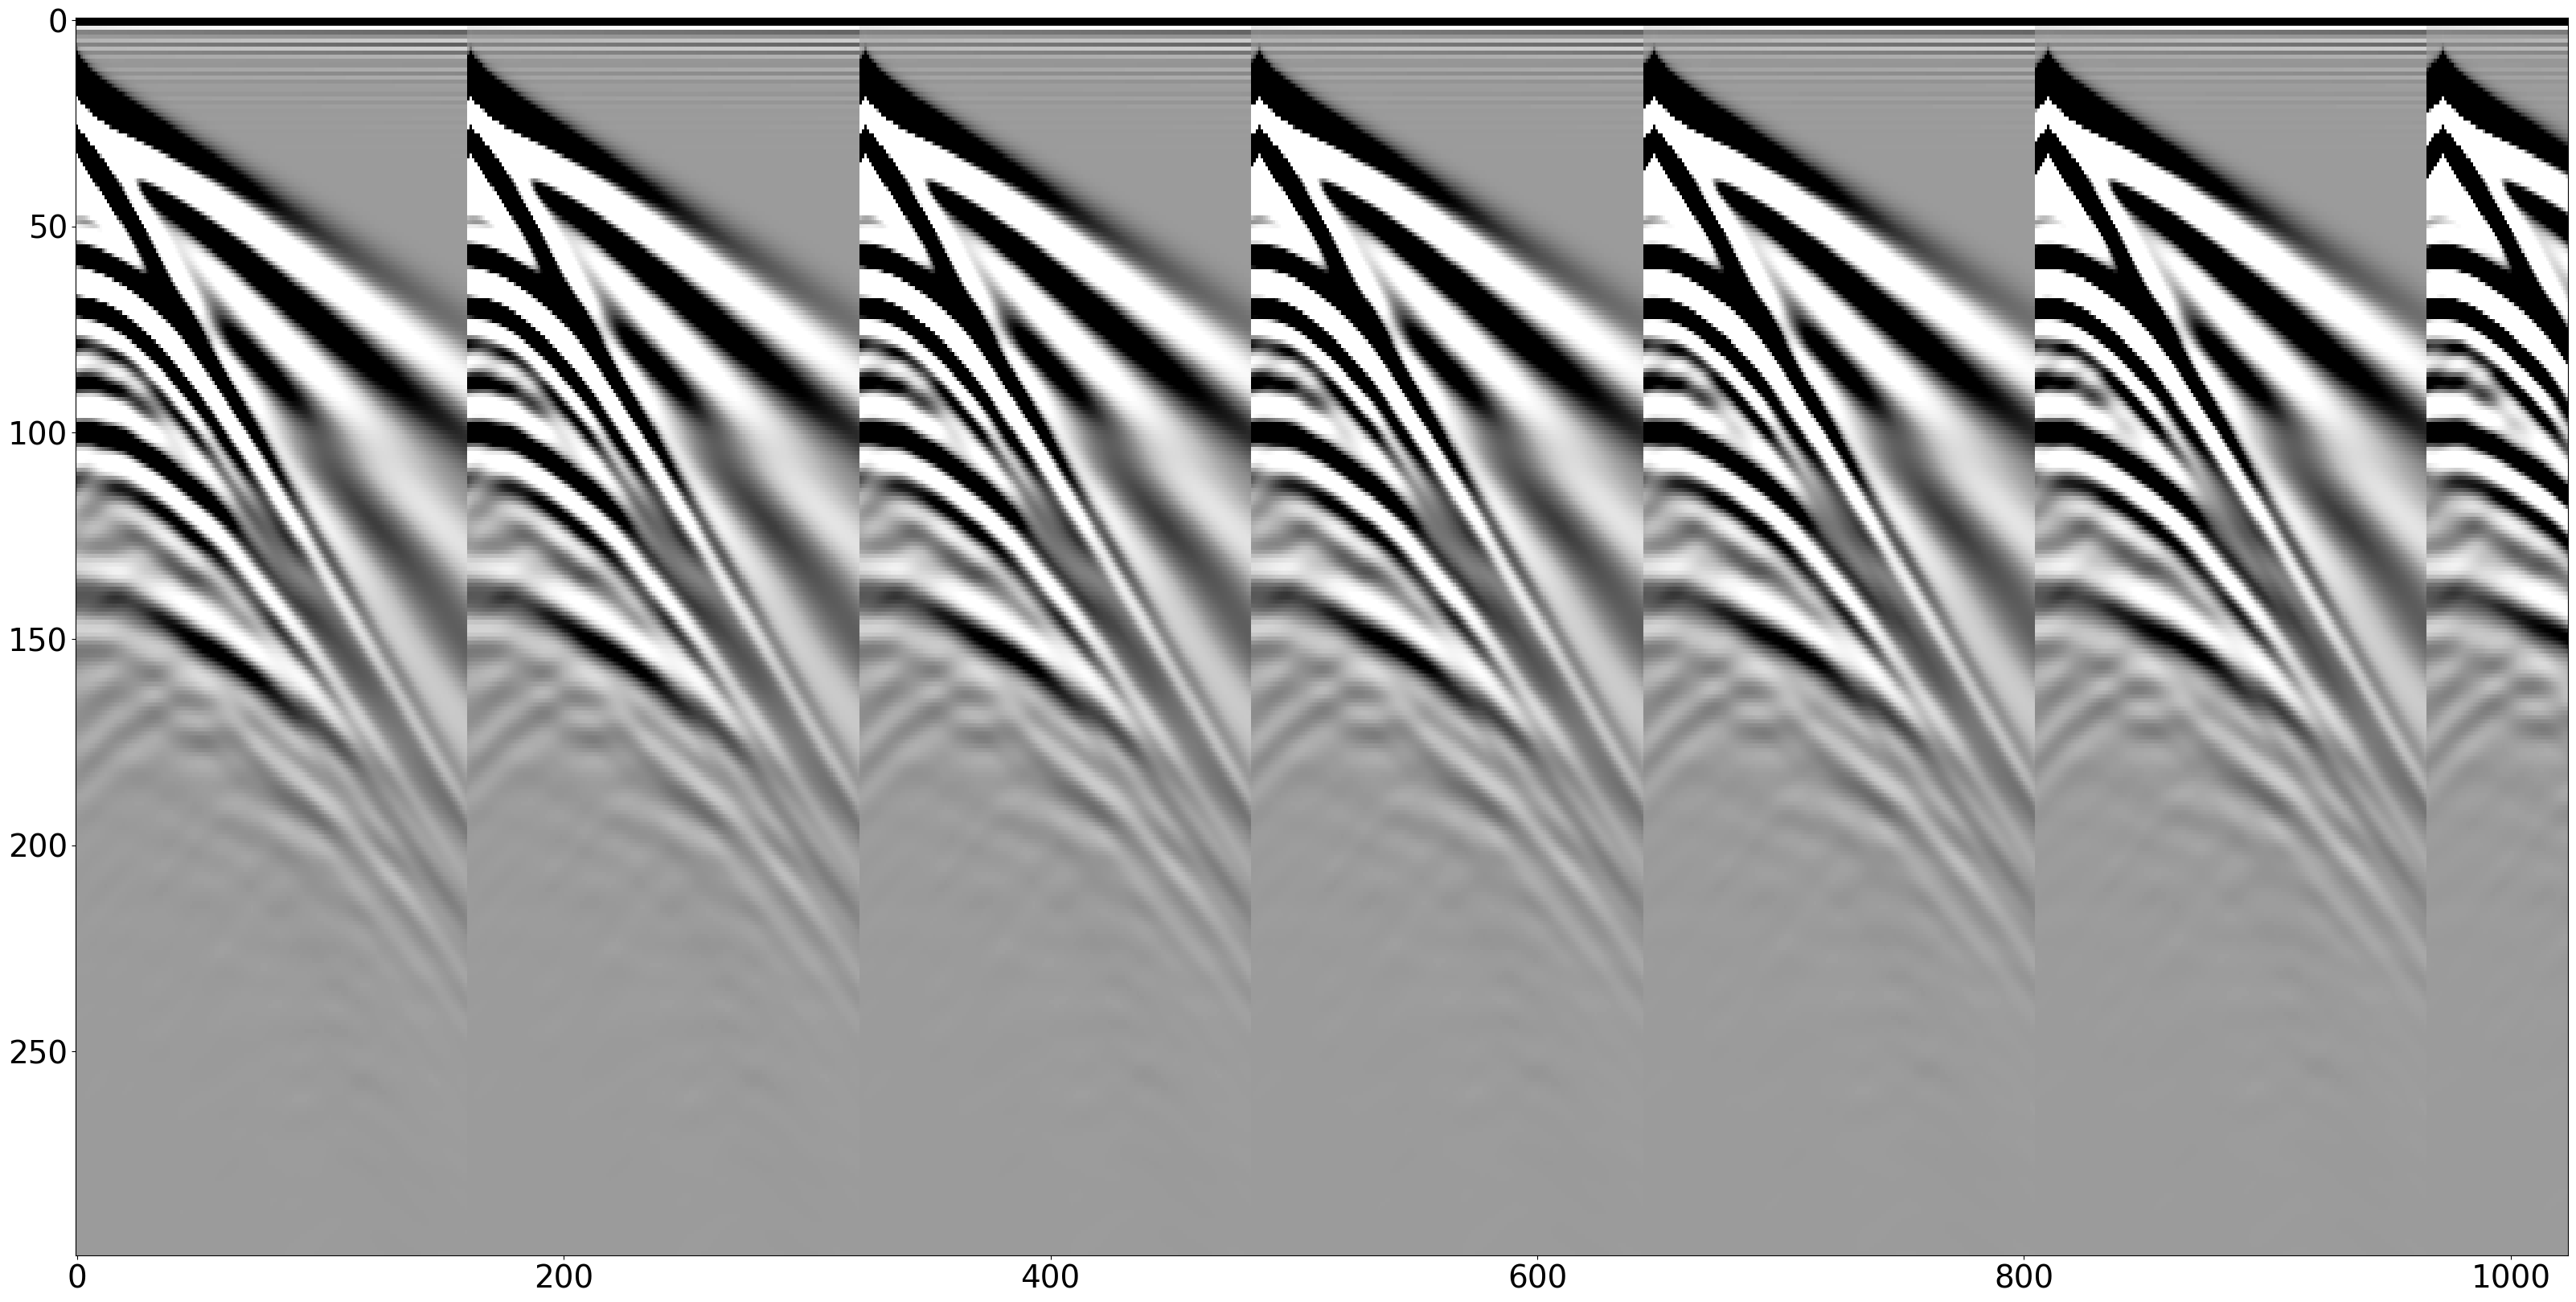

In [70]:
plt.figure(figsize=[40, 20])
plt.imshow(data_50[:1000].T)
vmi, vma = np.quantile(data_50[:1024, :], (0.05, 0.95))
plt.imshow(data_50[:1024, :300].T, aspect = "auto", vmin = vmi, vmax = vma, cmap = "Greys")

# Plot Sorted data

In [49]:
# number of receivers 
n_rec = 161
#sort
data_sort = data_50.reshape(n_rec, data_50.shape[0]//n_rec, data_50.shape[1])

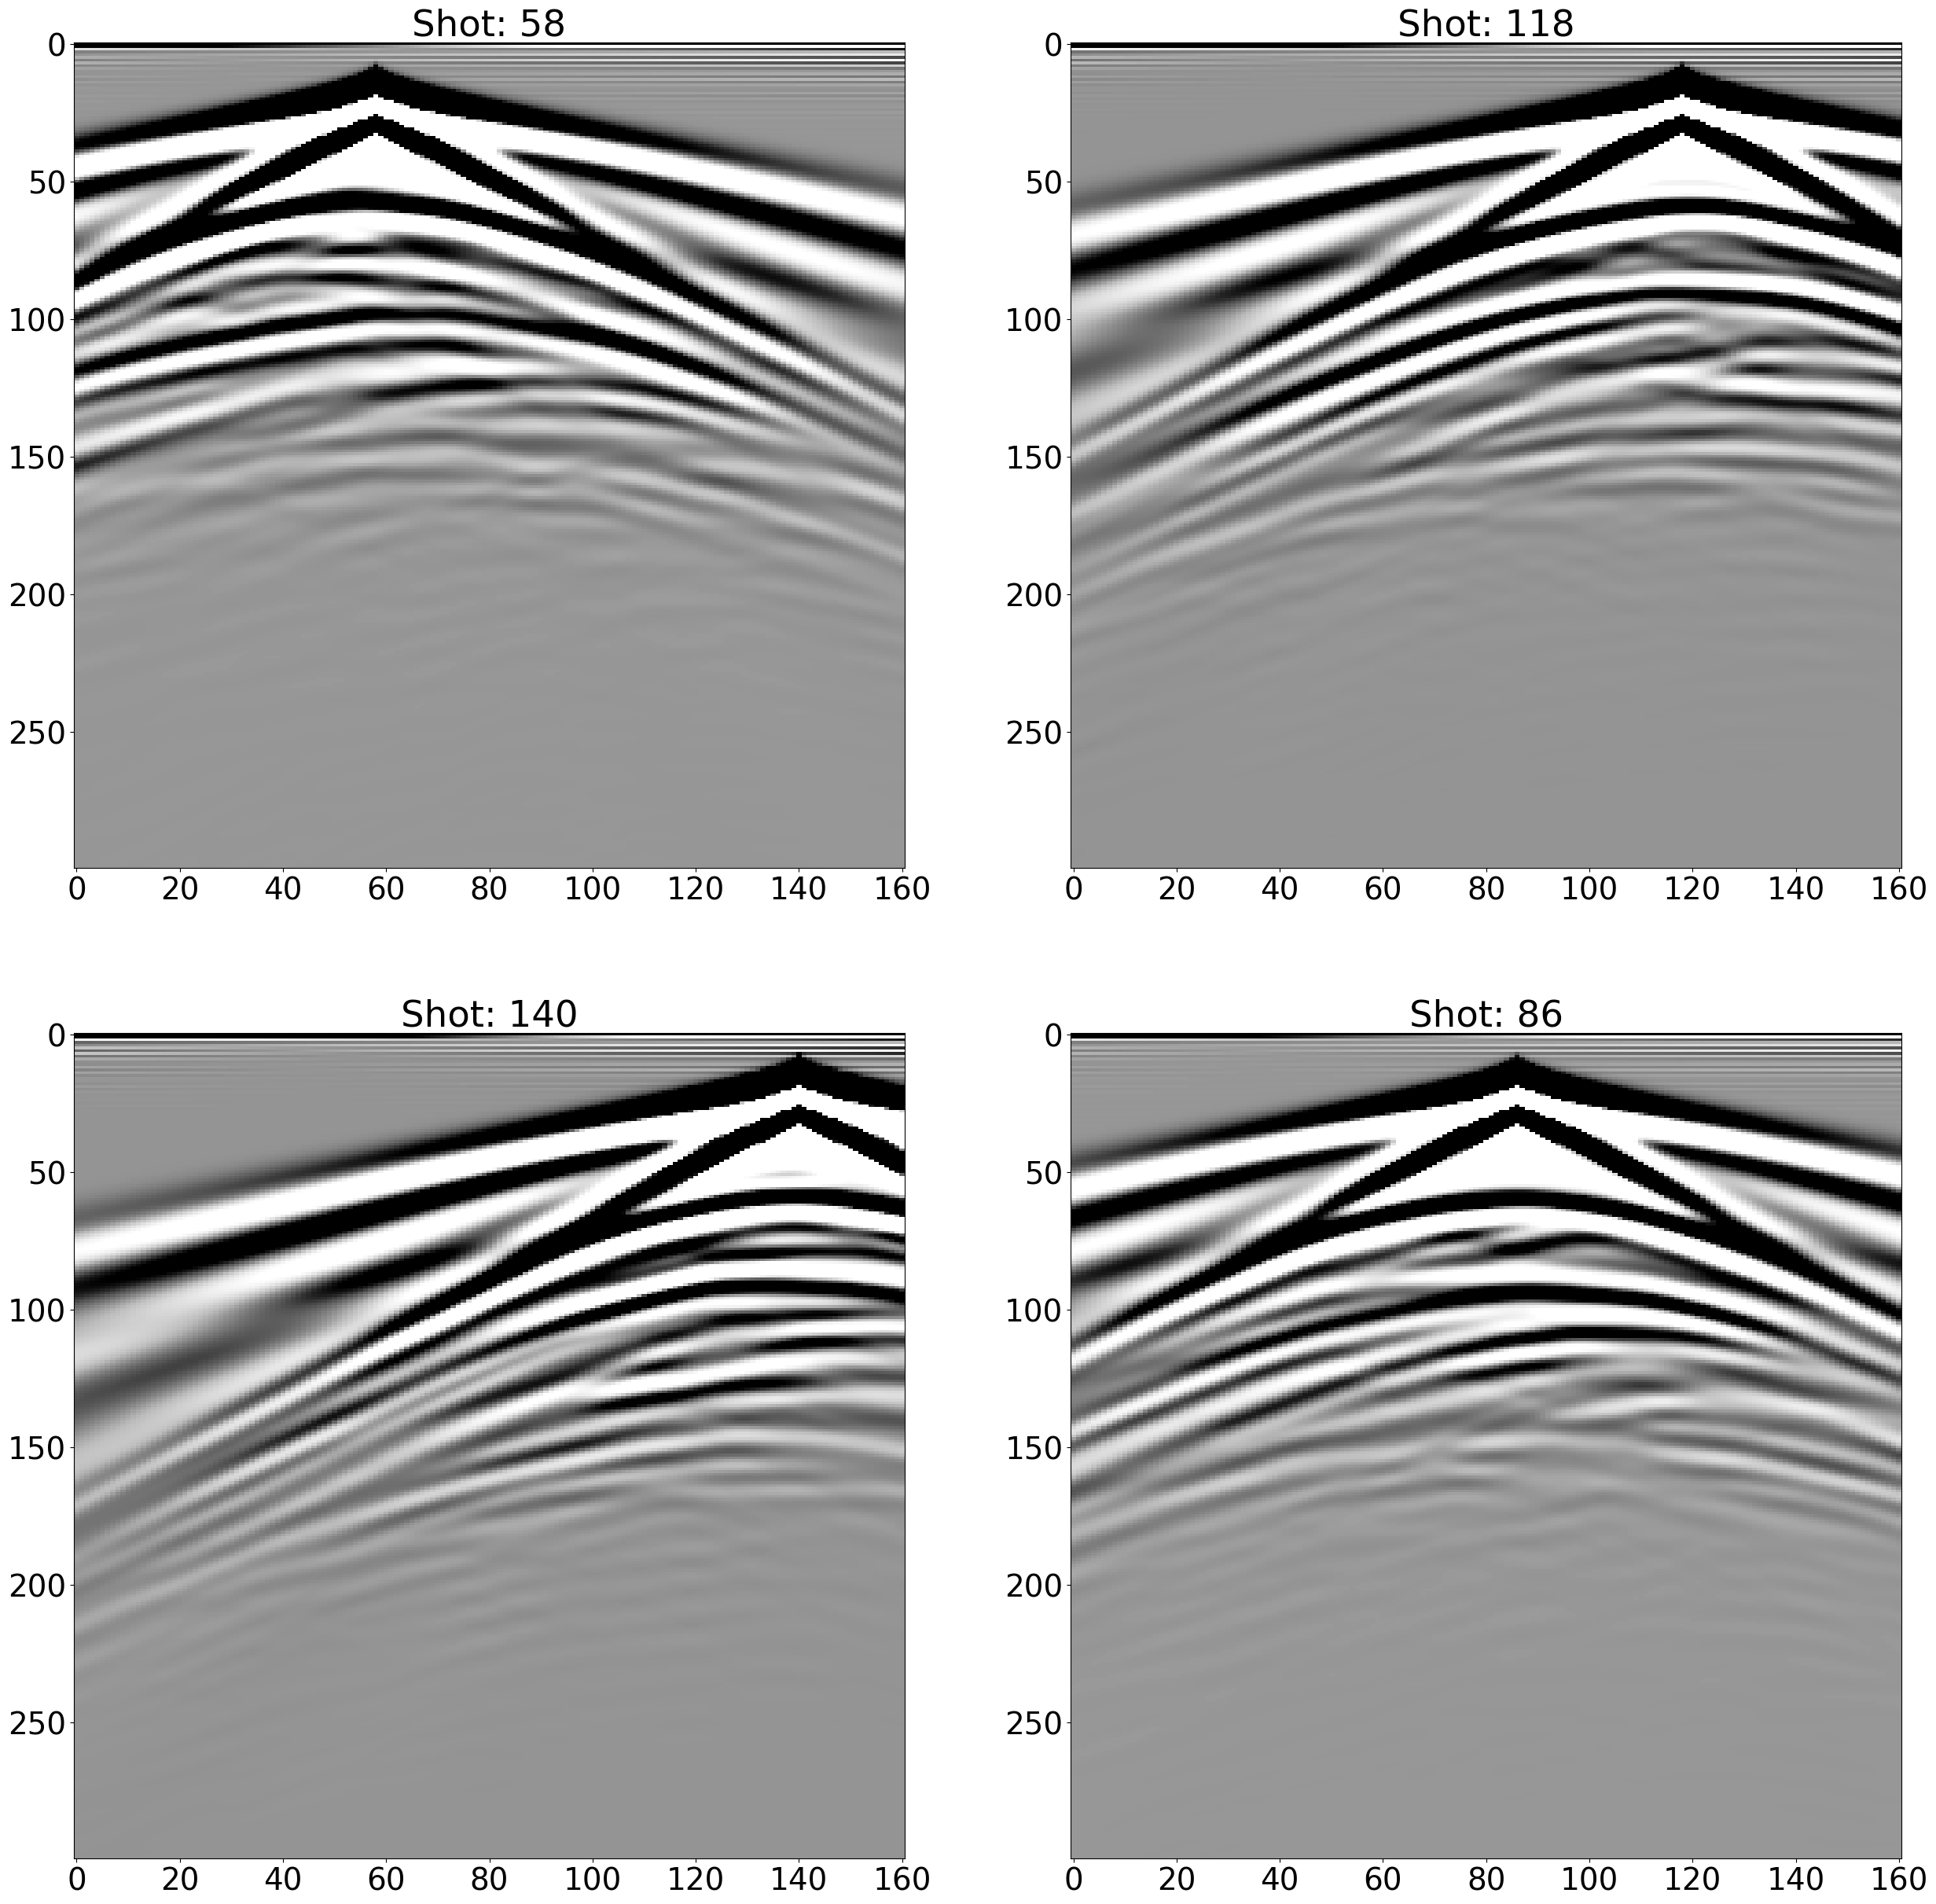

In [71]:
plt.figure(figsize=[30, 30])
for i in range(4):
    plt.subplot(221+i)
    idx = np.random.randint(data_sort.shape[1])
    vmi, vma = np.quantile(data_sort[:, idx, :], (0.05, 0.95))
    plt.title("Shot: " + str(idx))
    plt.imshow(data_sort[:, idx, :300].T, aspect = "auto", vmin = vmi, vmax = vma, cmap = "Greys")

# Header validation

tracen is a vector that looks like:  [    1     2     3 ... 25919 25920 25921]


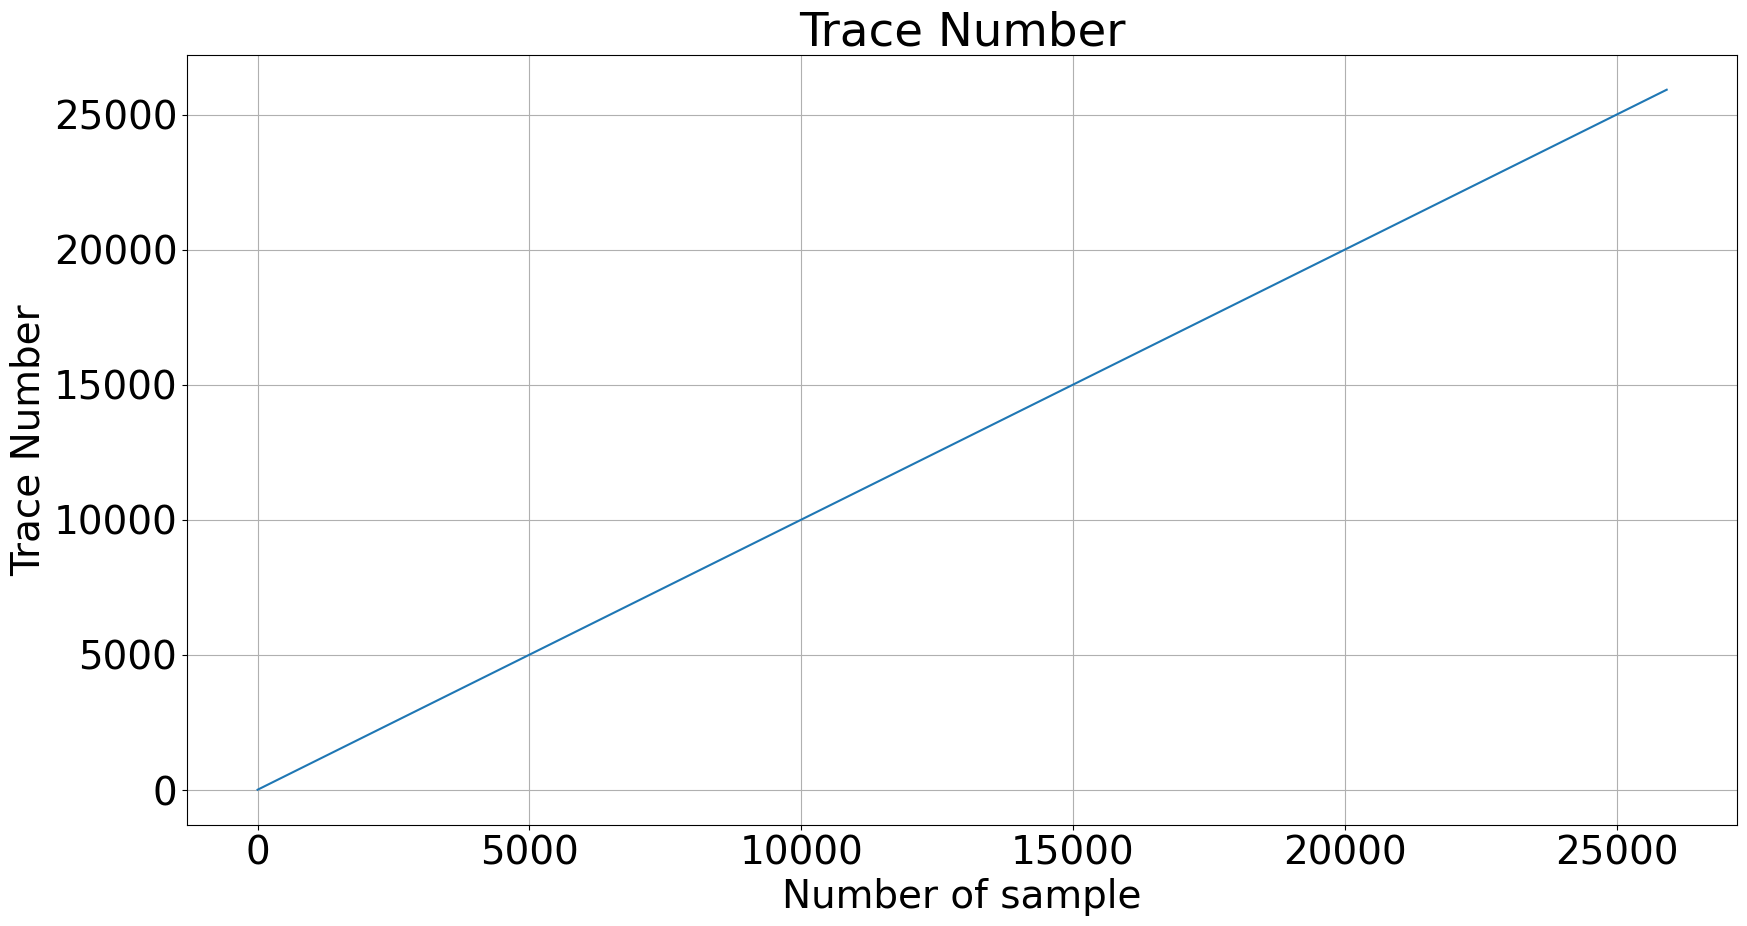

In [72]:
# Trace number
# Integer value from 1-25921, 
tracen = s.attributes(5)[:]
plt.figure(figsize=[20, 10])
plt.title("Trace Number")
plt.xlabel("Number of sample")
plt.ylabel("Trace Number")
plt.grid(True)
plt.plot(tracen)

print("tracen is a vector that looks like: ", tracen)

field_rec is a vector that looks like:  [  1   1   1 ... 161 161 161]


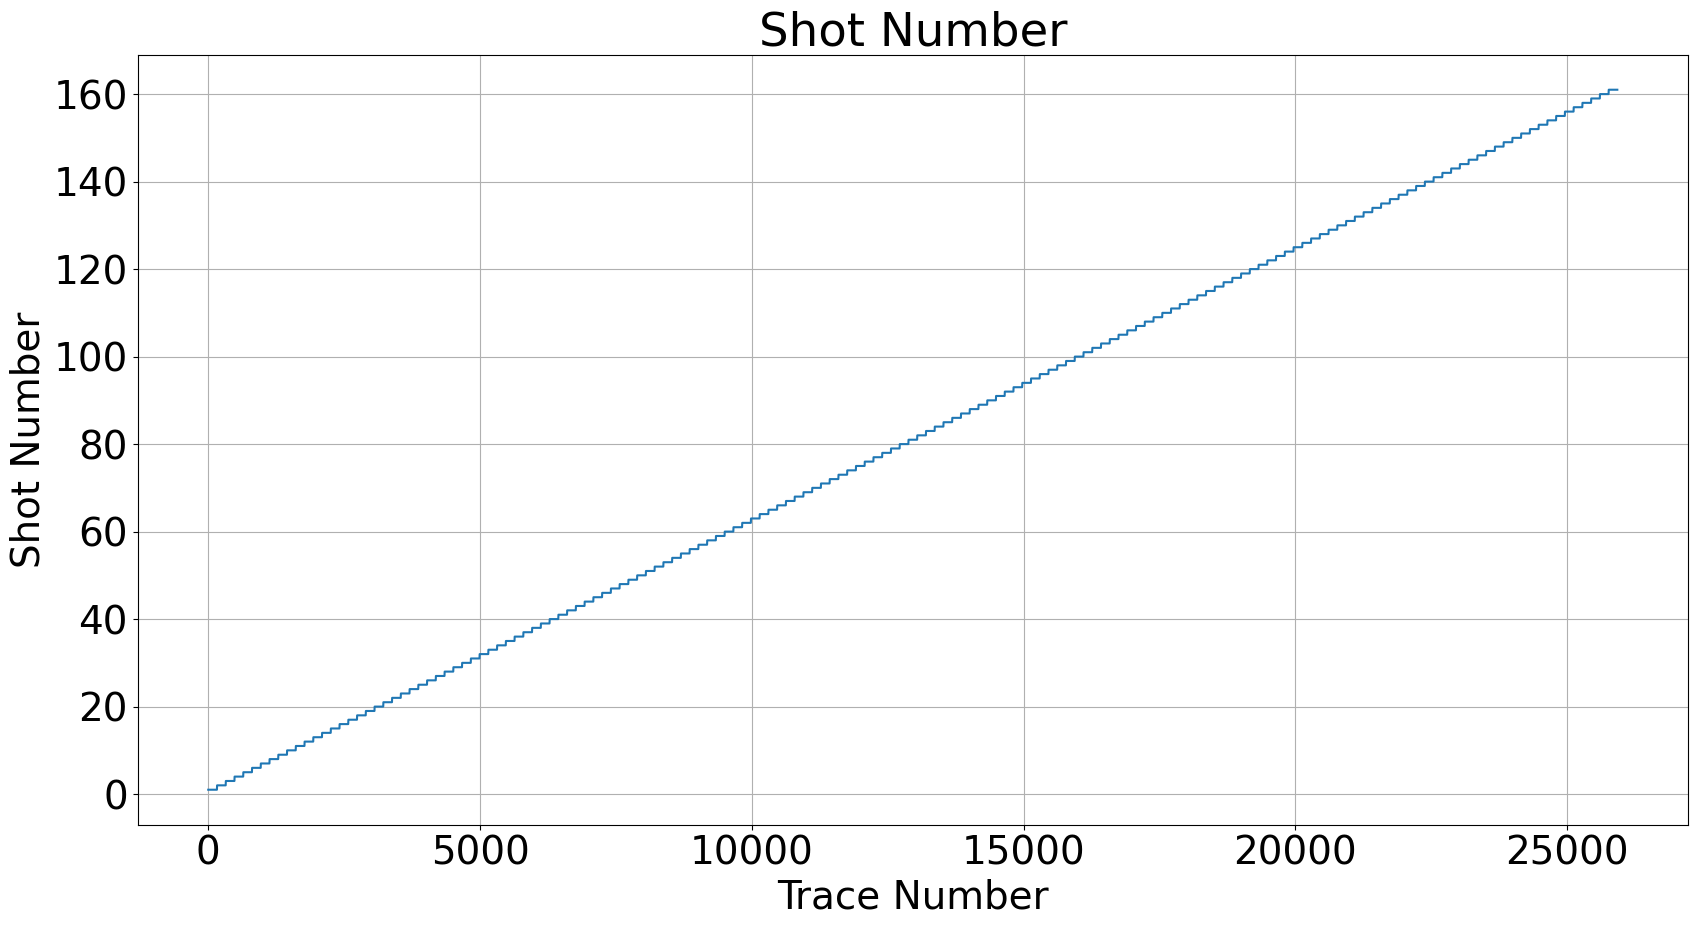

In [73]:
# field_rec is a field equivalent to the number of shot
field_rec = s.attributes(9)[:]
plt.figure(figsize=[20, 10])
plt.title("Shot Number")
plt.xlabel("Trace Number")
plt.ylabel("Shot Number")
plt.grid(True)
plt.plot(field_rec)

print("field_rec is a vector that looks like: ", field_rec)

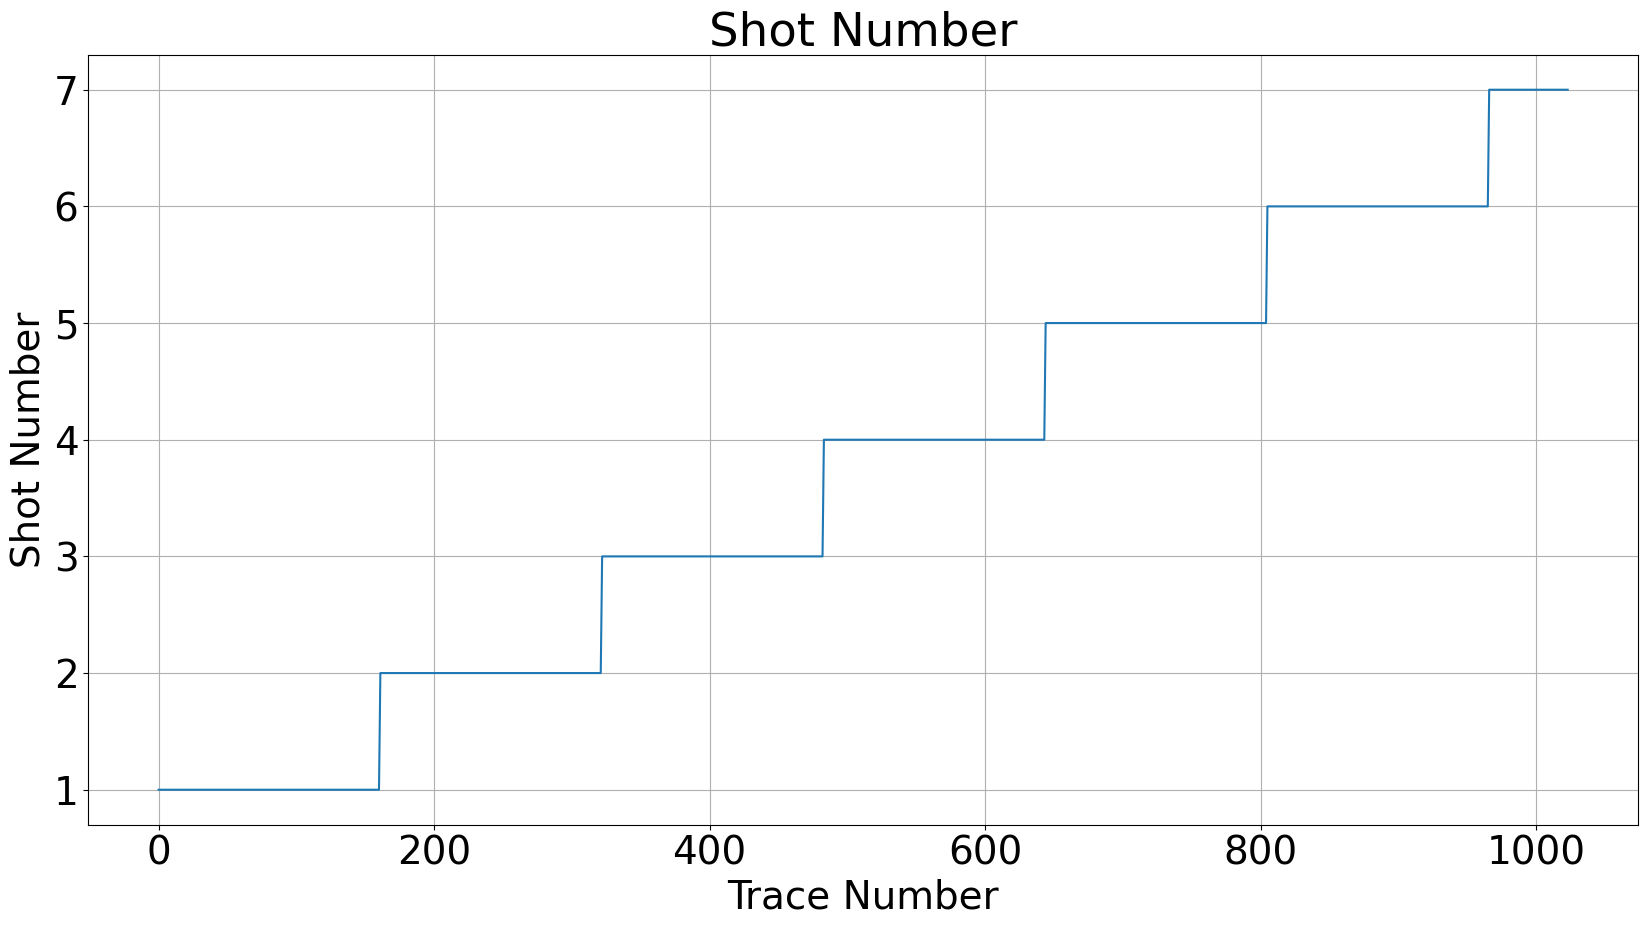

In [74]:
# zoom on fieldrec: one shot has 161 traces, i.e. Shot Number increments by one every 161
plt.figure(figsize=[20, 10])
plt.title("Shot Number")
plt.xlabel("Trace Number")
plt.ylabel("Shot Number")
plt.grid(True)
plt.plot(field_rec[:1024])

recorder_number is a vector that looks like:  [  1   2   3 ... 159 160 161]


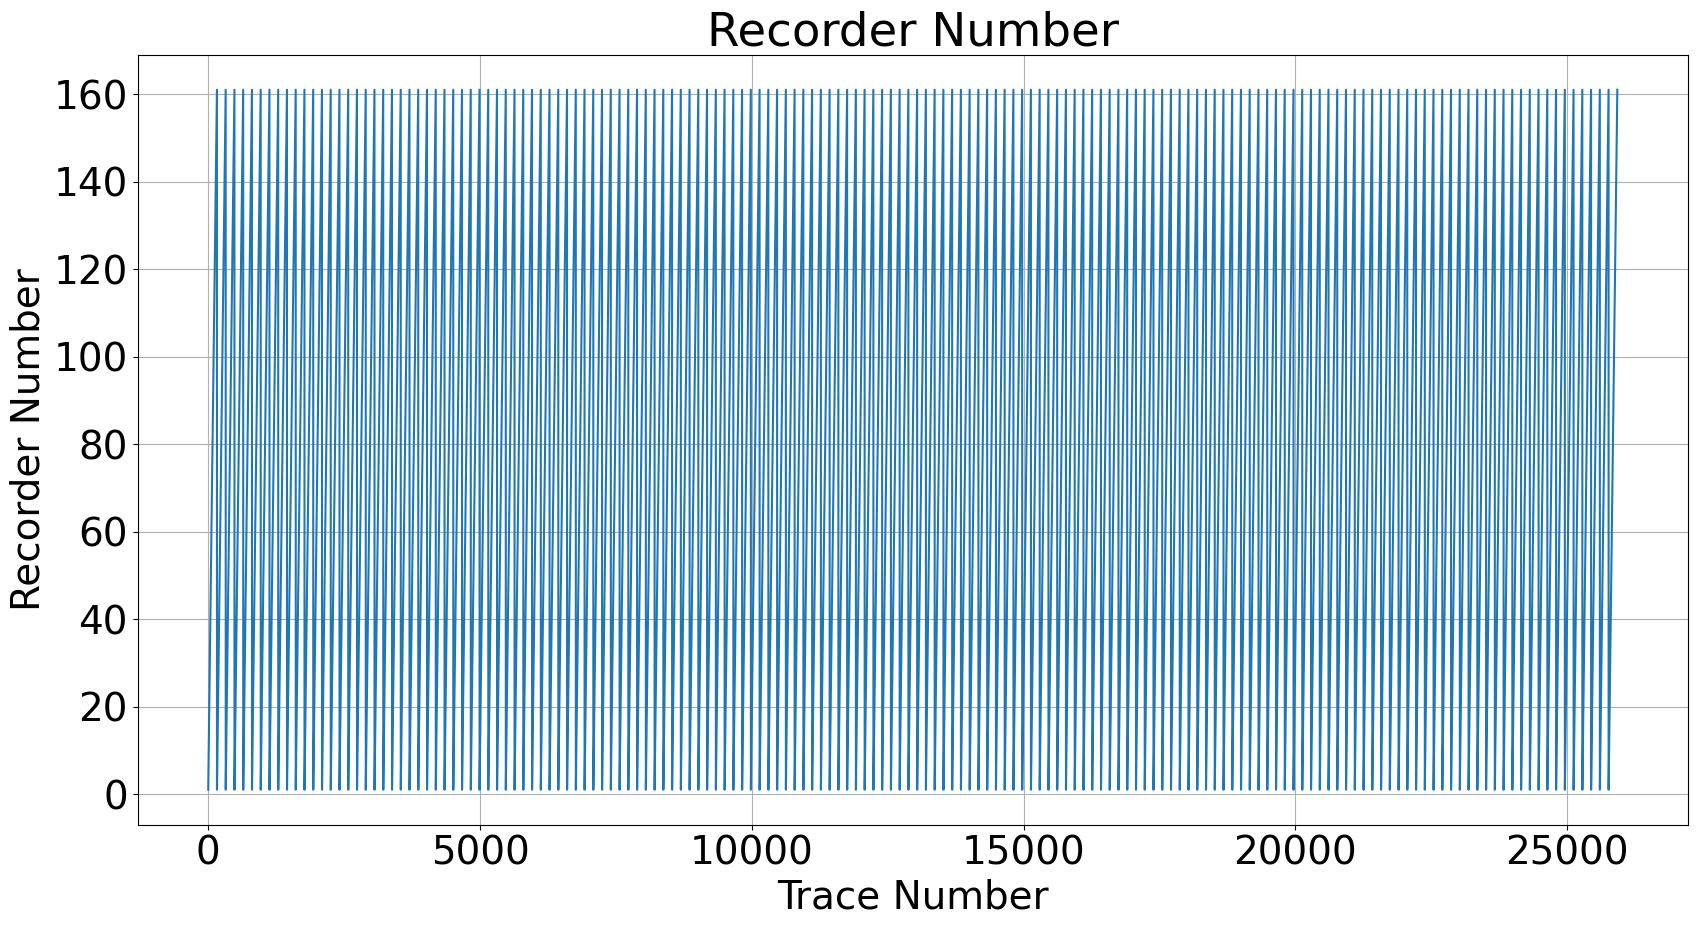

In [75]:
# recorder_number is a field equivalent to a integer that identifies the recorder
recorder_number = s.attributes(13)[:] 
print("recorder_number is a vector that looks like: ", recorder_number)
plt.figure(figsize=[20, 10])
plt.title("Recorder Number")
plt.xlabel("Trace Number")
plt.ylabel("Recorder Number")
plt.grid(True)
plt.plot(recorder_number)

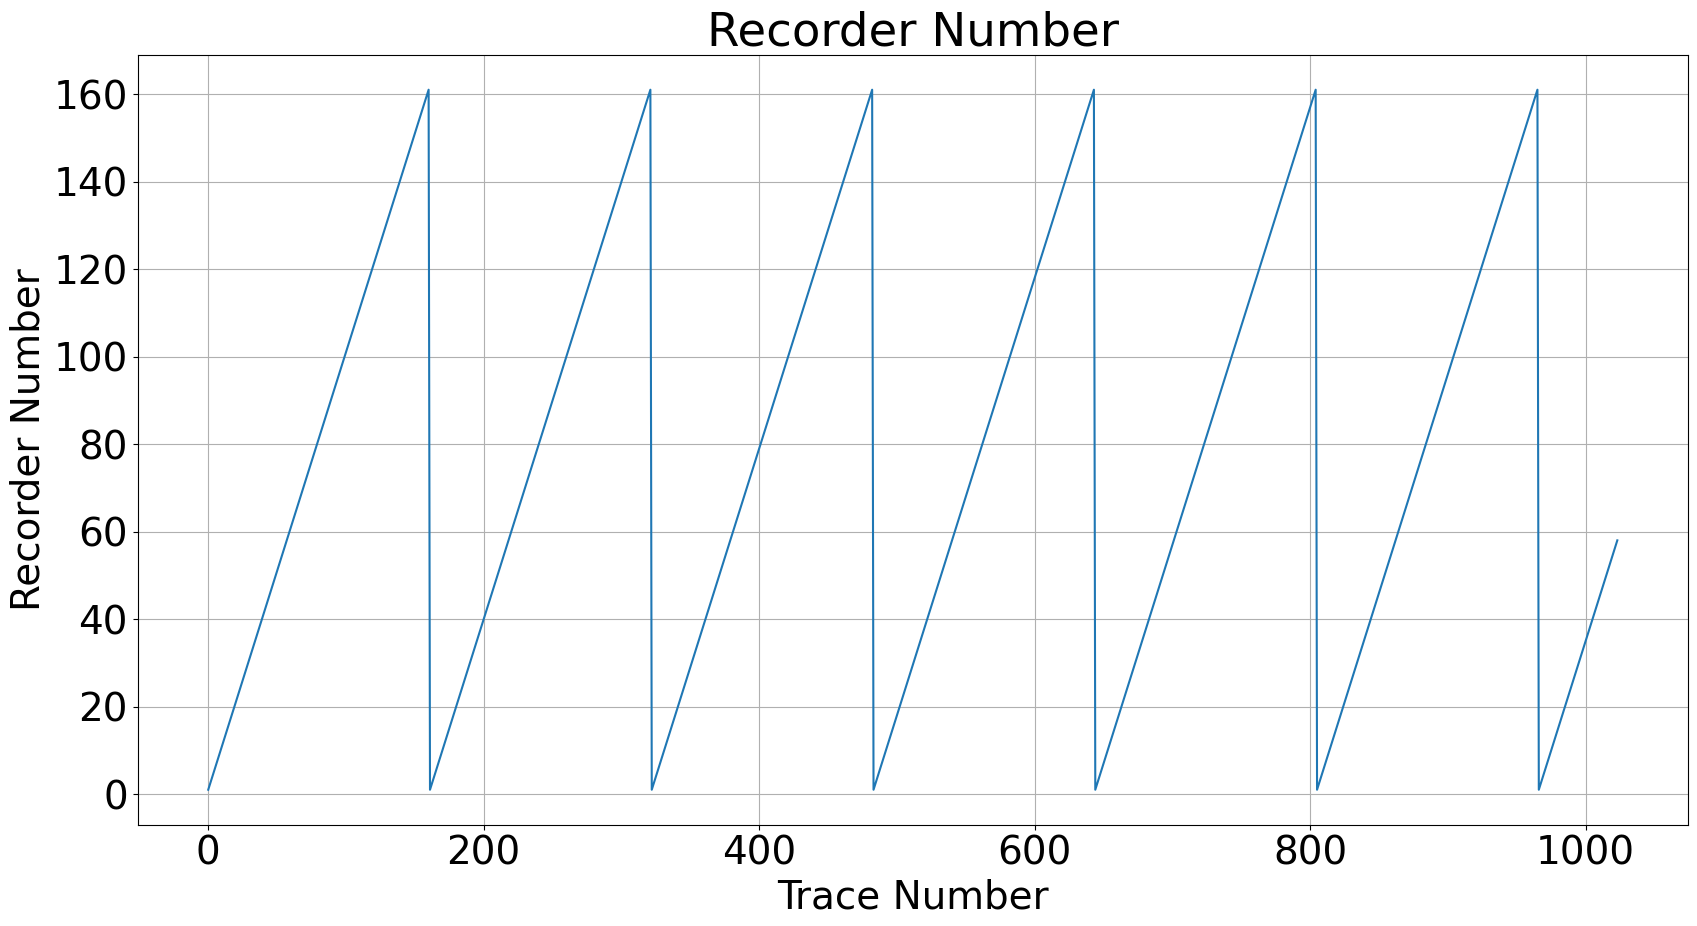

In [76]:
# zoom on recorder_number: one shot has 161 recorders, i.e. Recorder Number increments from 1 to 161 and goes back to 1 once the source moves.
plt.figure(figsize=[20, 10])
plt.title("Recorder Number")
plt.xlabel("Trace Number")
plt.ylabel("Recorder Number")
plt.grid(True)
plt.plot(recorder_number[:1024])

source_number is a vector that looks like:  [  1   1   1 ... 161 161 161]


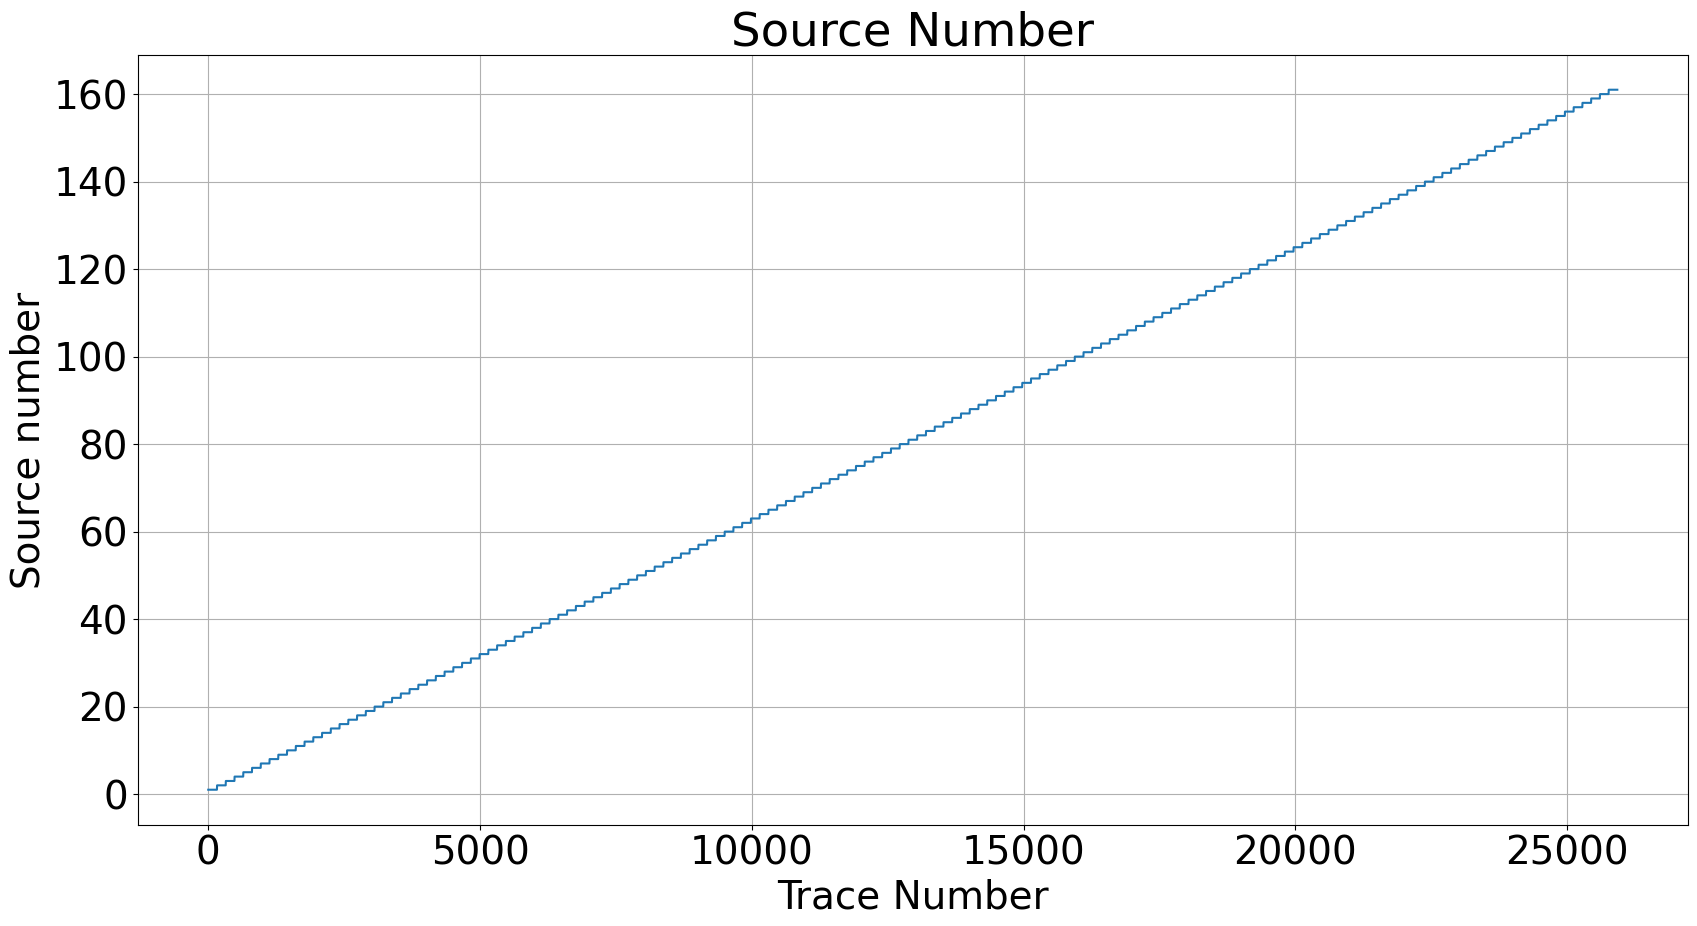

In [77]:
# recorder_number is a field equivalent to a integer that identifies the recorder
source_number = s.attributes(17)[:]
print("source_number is a vector that looks like: ", source_number)
plt.figure(figsize=[20, 10])
plt.title("Source Number")
plt.xlabel("Trace Number")
plt.ylabel("Source number")
plt.grid(True)
plt.plot(source_number)

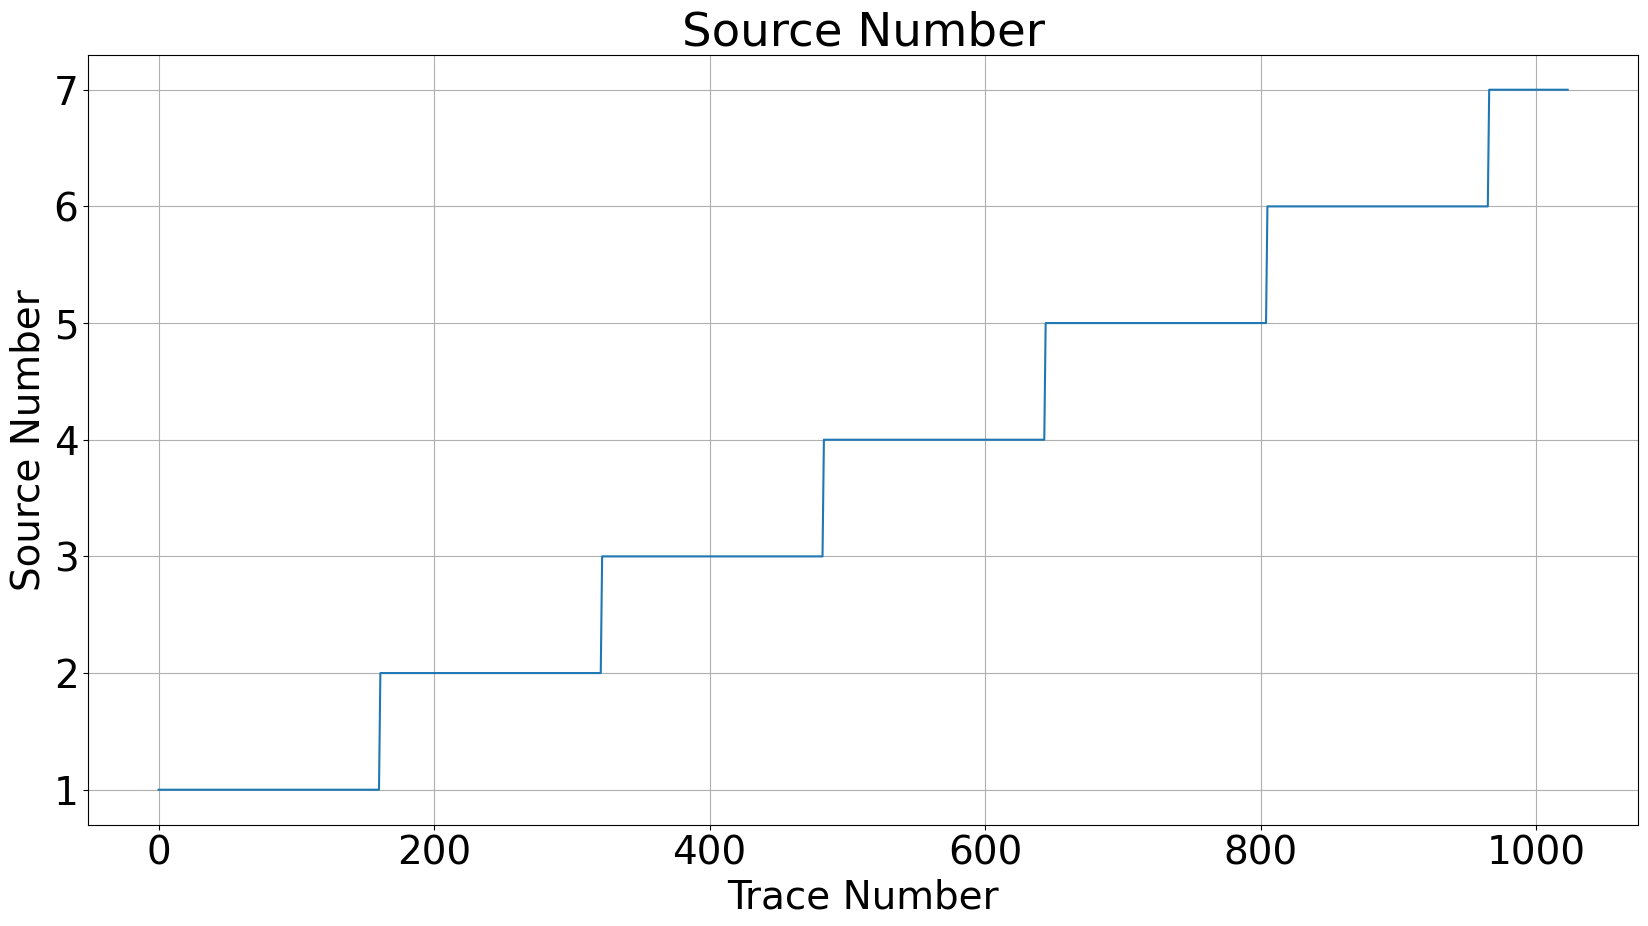

In [78]:
# zoom on source_number: one shot has 161 recorders, i.e. Shot Number stays at 1 for the 161 recording and the + 1
plt.figure(figsize=[20, 10])
plt.title("Source Number")
plt.xlabel("Trace Number")
plt.ylabel("Source Number")
plt.grid(True)
plt.plot(source_number[:1024])

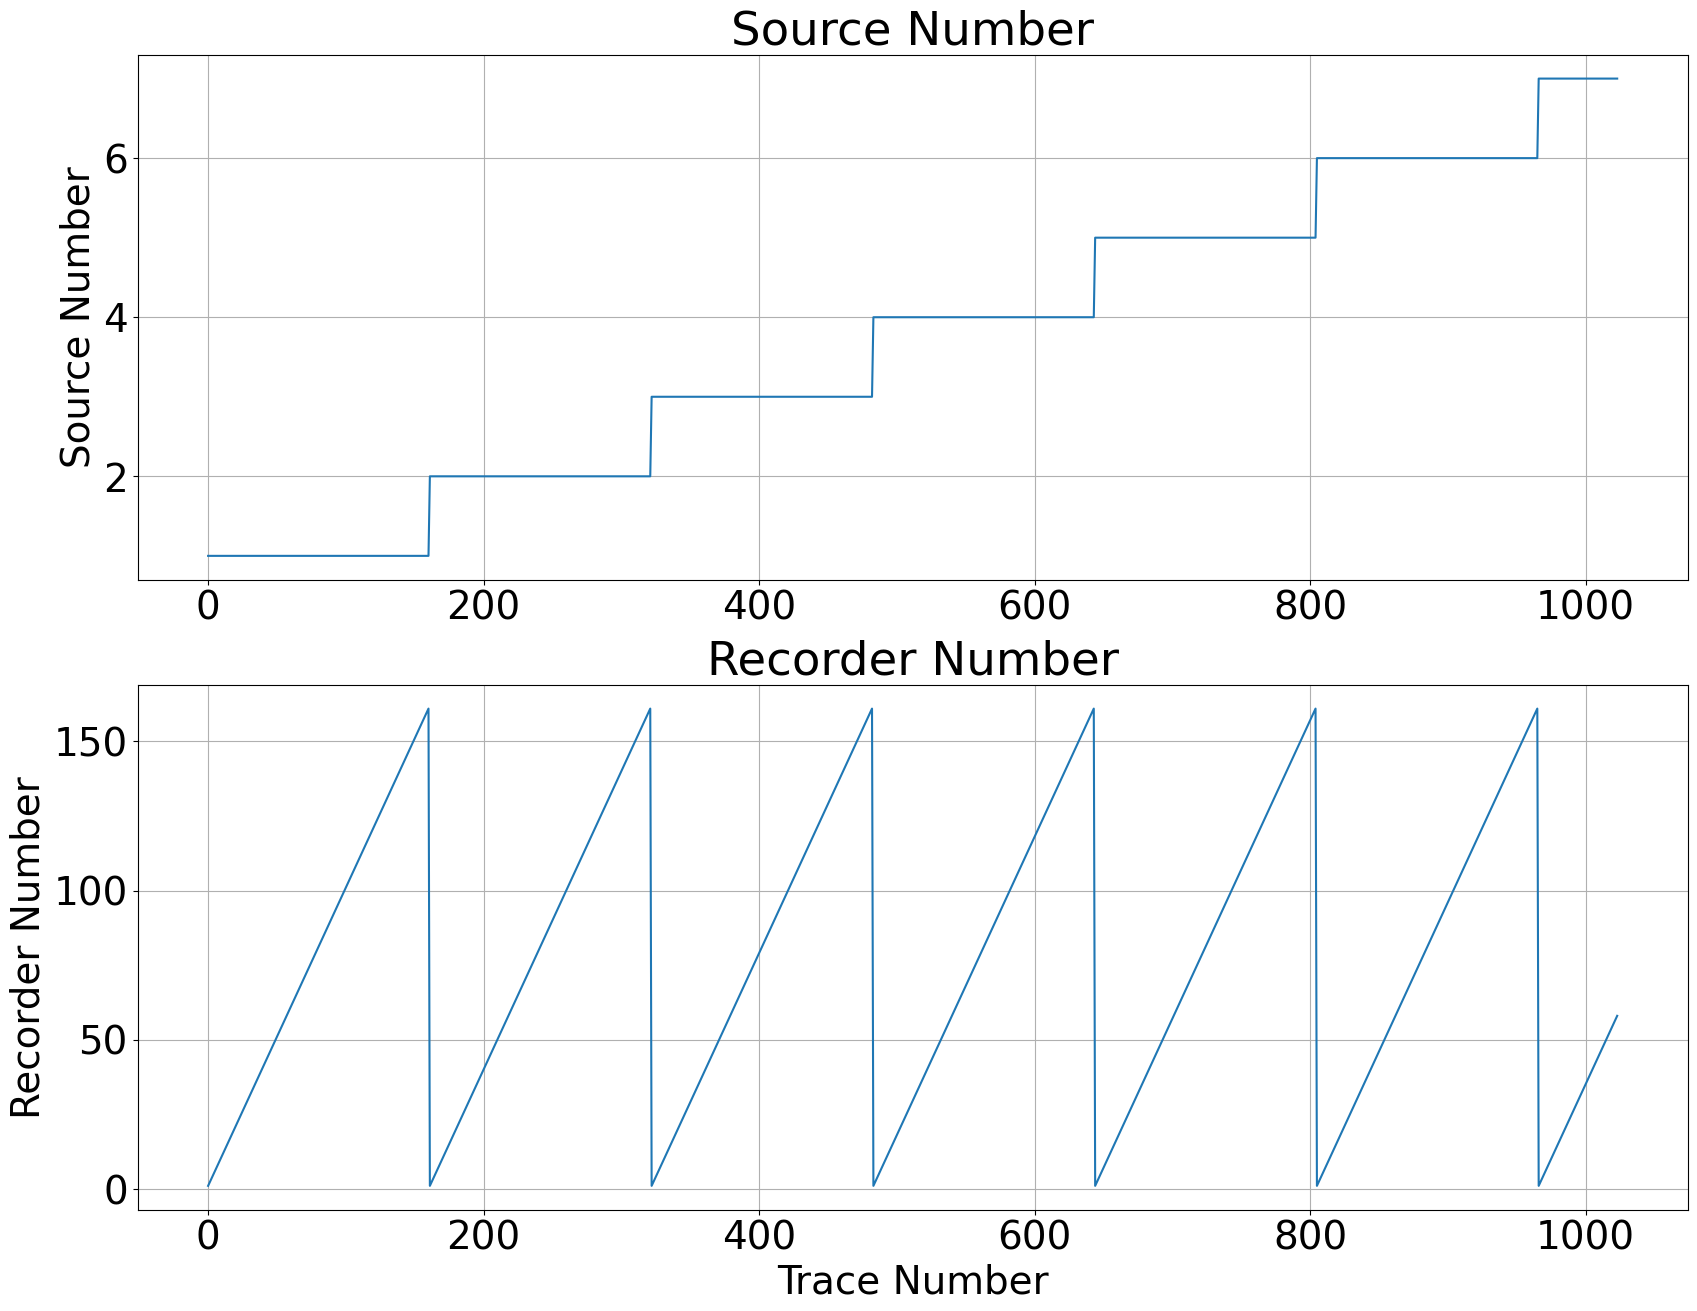

In [79]:
# zoom on source_number: one shot has 161 recorders, i.e. Shot Number stays at 1 for the 161 recording and the + 1
plt.figure(figsize=[20, 15])
plt.subplot(211)
plt.title("Source Number")
plt.ylabel("Source Number")
plt.grid(True)
plt.plot(source_number[:1024])
plt.subplot(212)
plt.title("Recorder Number")
plt.xlabel("Trace Number")
plt.ylabel("Recorder Number")
plt.grid(True)
plt.plot(recorder_number[:1024])

source_x is a vector that looks like:  [   0    0    0 ... 1600 1600 1600]


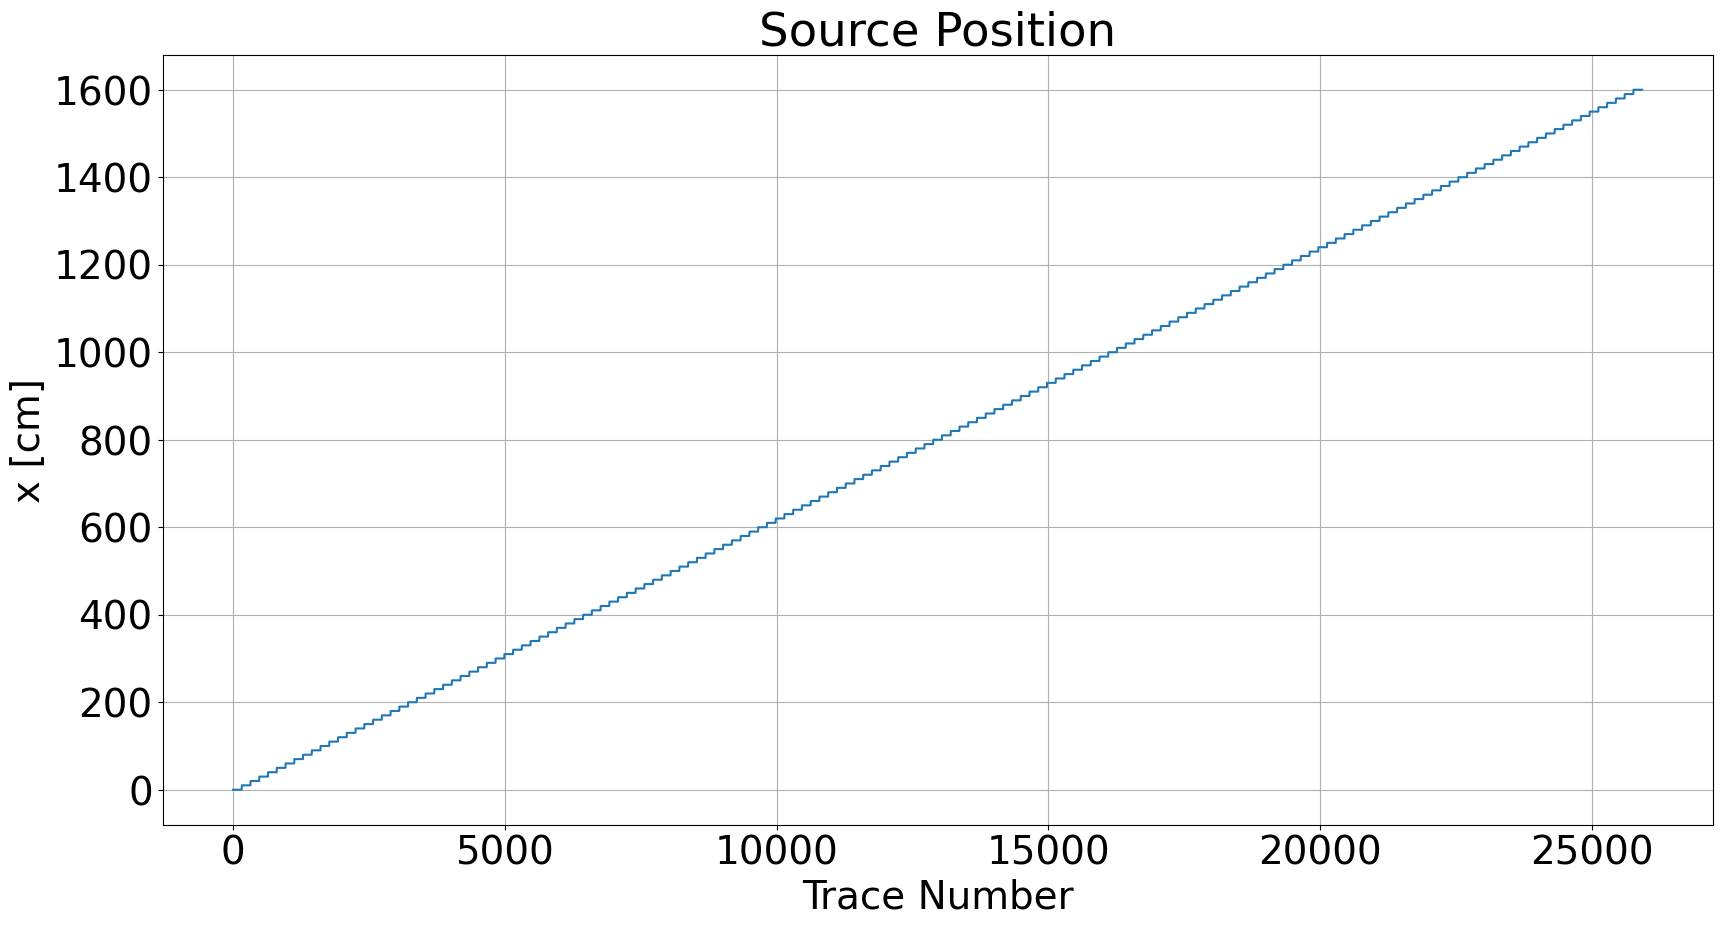

In [80]:
# source_x is a field equivalent to a integer that identifies the source position [cm]
# we chose [cm] due to a limitation in the segy file, i.e. values of this field are stored as integer.
source_x = s.attributes(73)[:]
print("source_x is a vector that looks like: ", source_x)
plt.figure(figsize=[20, 10])
plt.title("Source Position")
plt.xlabel("Trace Number")
plt.ylabel("x [cm]")
plt.grid(True)
plt.plot(source_x)

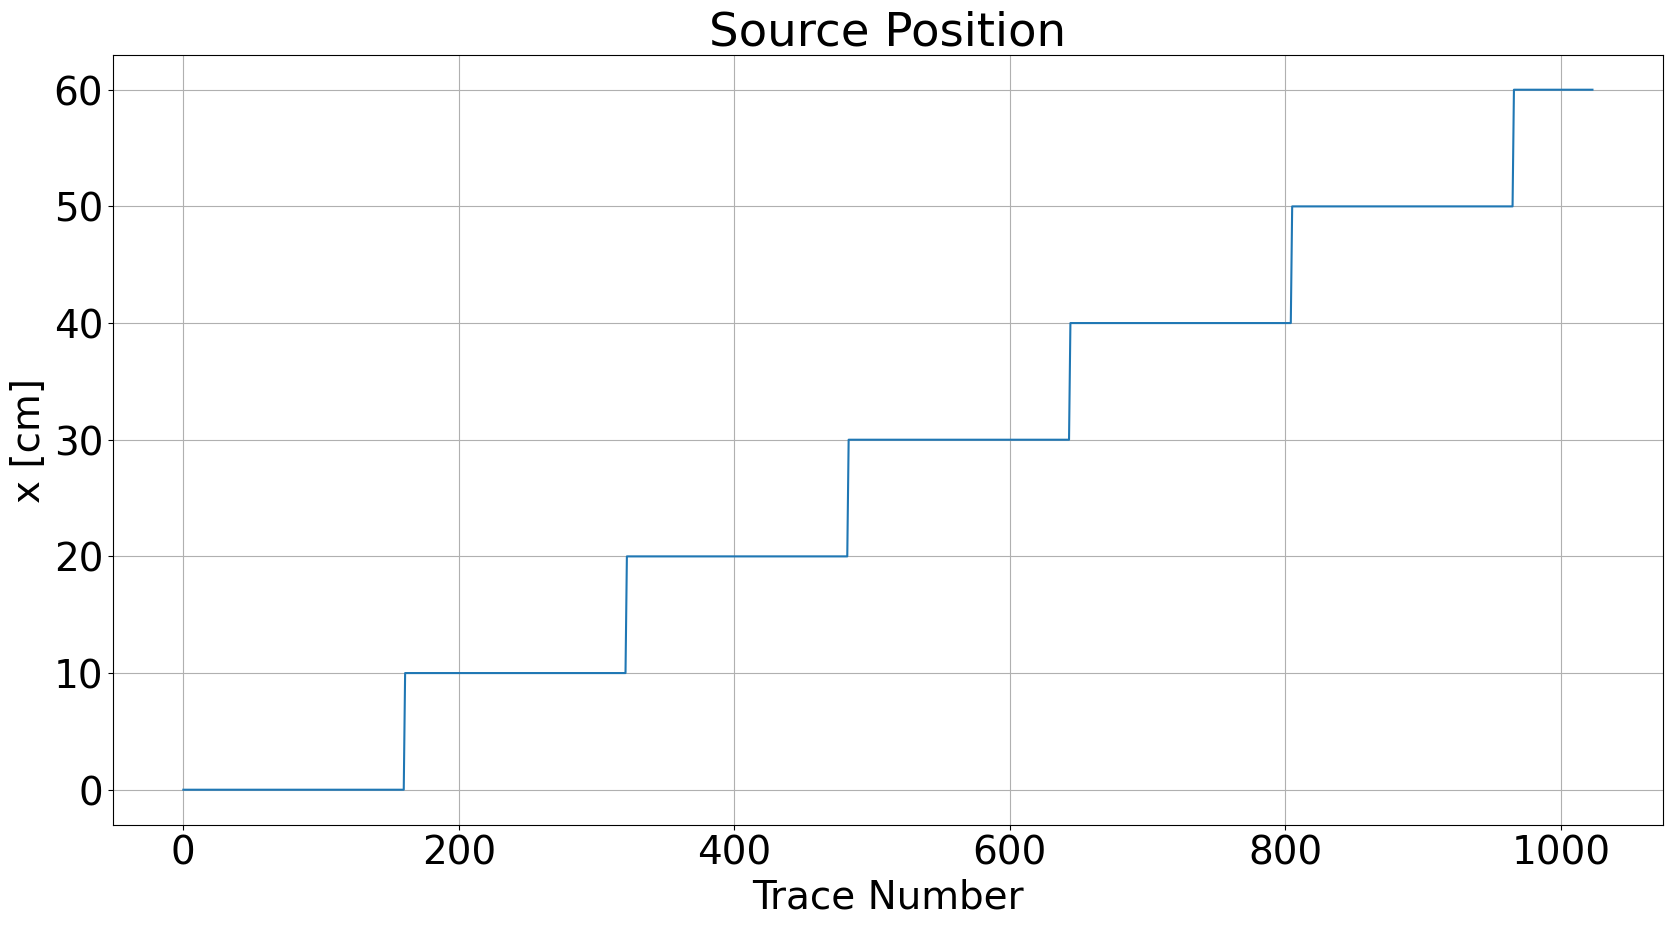

In [81]:
# As described in the paper, source are moved by 10cm each shot.
plt.figure(figsize=[20, 10])
plt.title("Source Position")
plt.xlabel("Trace Number")
plt.ylabel("x [cm]")
plt.grid(True)
plt.plot(source_x[:1024])

rec_x is a vector that looks like:  [   0   10   20 ... 1580 1590 1600]


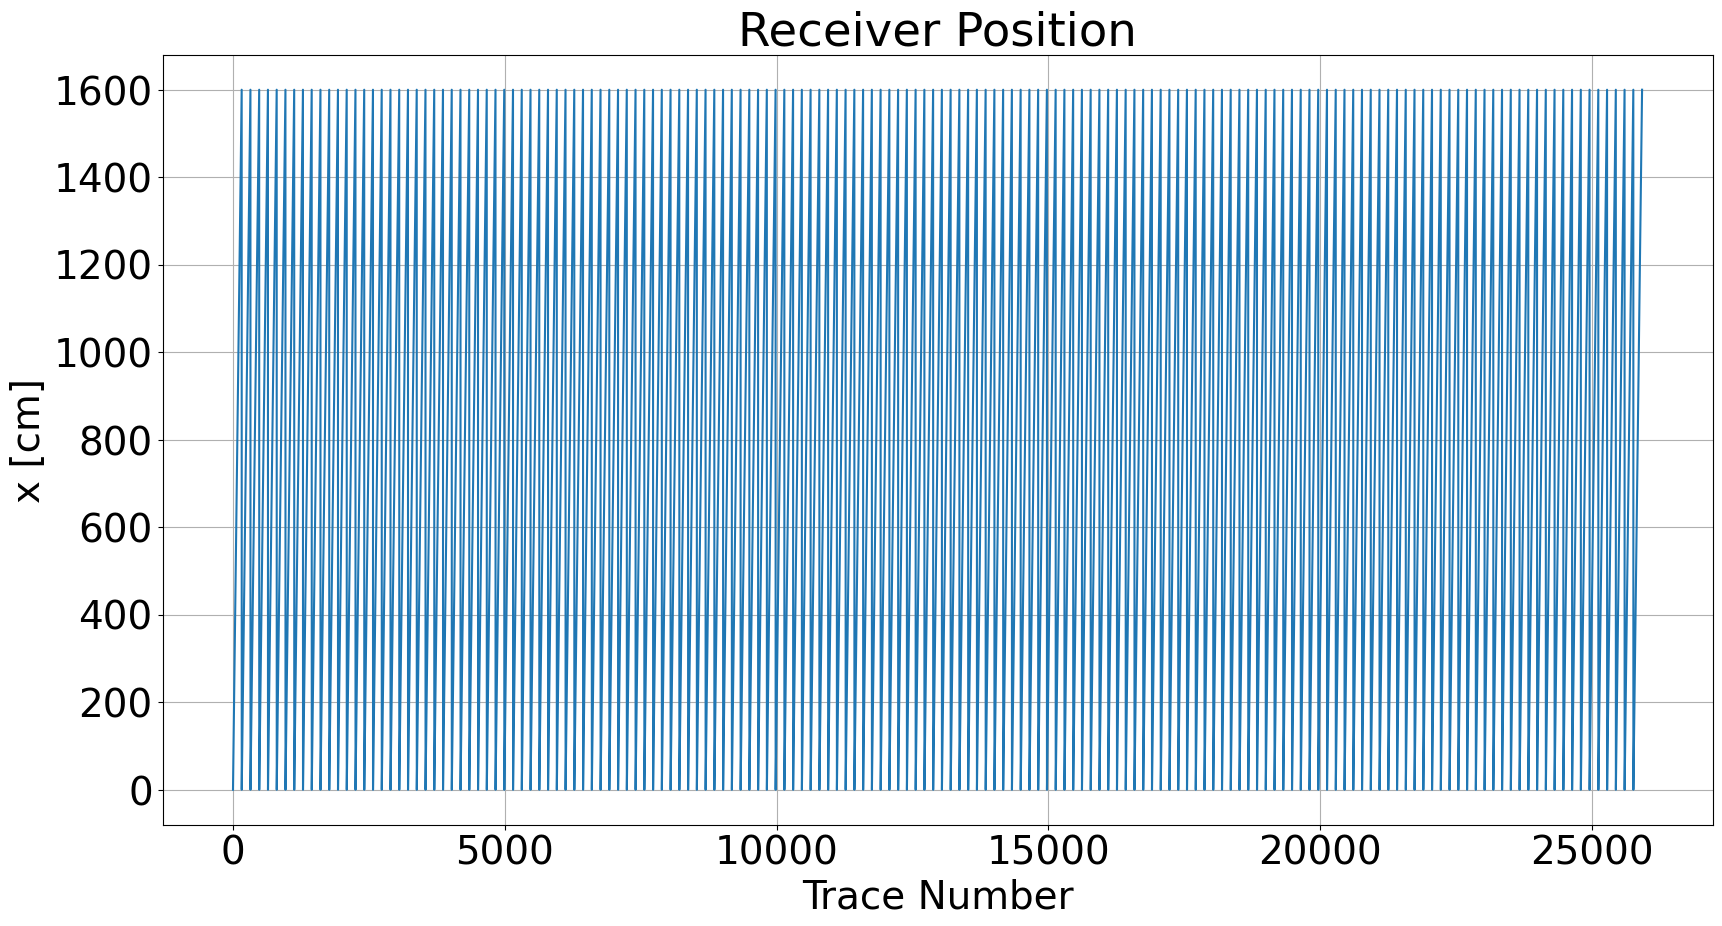

In [82]:
# rec_x is a field equivalent to a integer that identifies the receiver position [cm]
rec_x = s.attributes(81)[:]
print("rec_x is a vector that looks like: ", rec_x)
plt.figure(figsize=[20, 10])
plt.title("Receiver Position")
plt.xlabel("Trace Number")
plt.ylabel("x [cm]")
plt.grid(True)
plt.plot(rec_x)

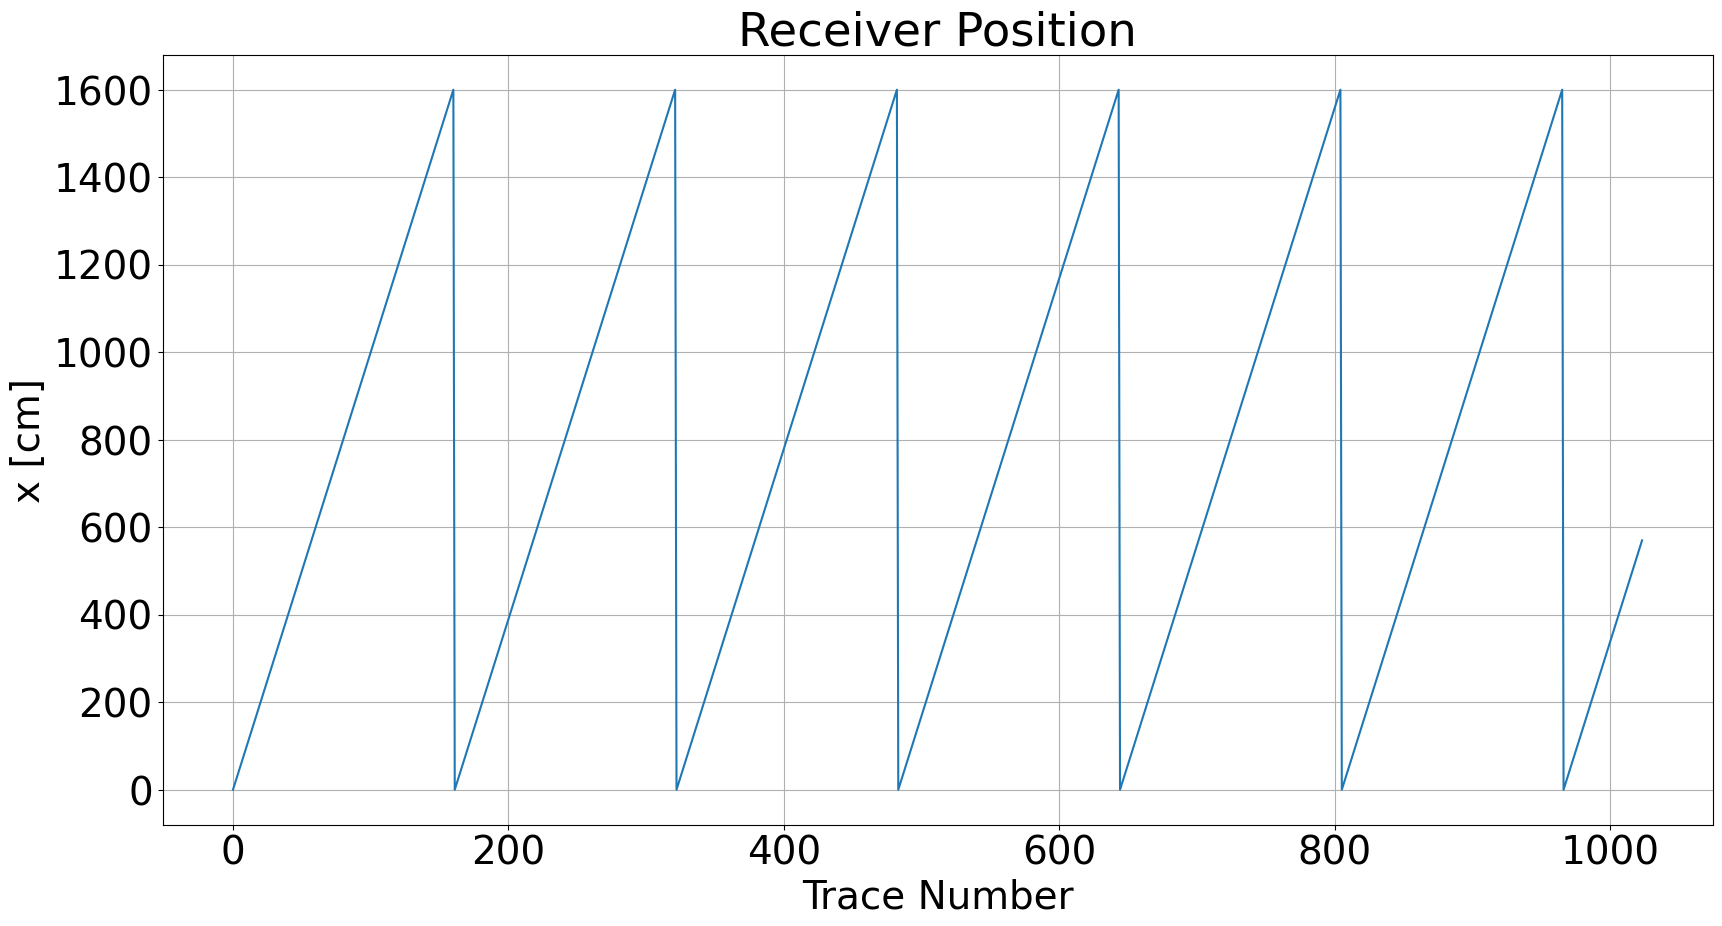

In [83]:
# As described in the paper, receiver are spaced by 10cm one from the other.
plt.figure(figsize=[20, 10])
plt.title("Receiver Position")
plt.xlabel("Trace Number")
plt.ylabel("x [cm]")
plt.grid(True)
plt.plot(rec_x[:1024])

In [84]:
# dt is a field equivalent to a integer that identifies the delta t of the file [ps]
# dt is constant along the whole simulation
dt       = s.attributes(117)[:]
print("dt is a vector that looks like: ", dt)

dt is a vector that looks like:  [1179 1179 1179 ... 1179 1179 1179]


CMP is a vector that looks like:  [   0    5   10 ... 1590 1595 1600]


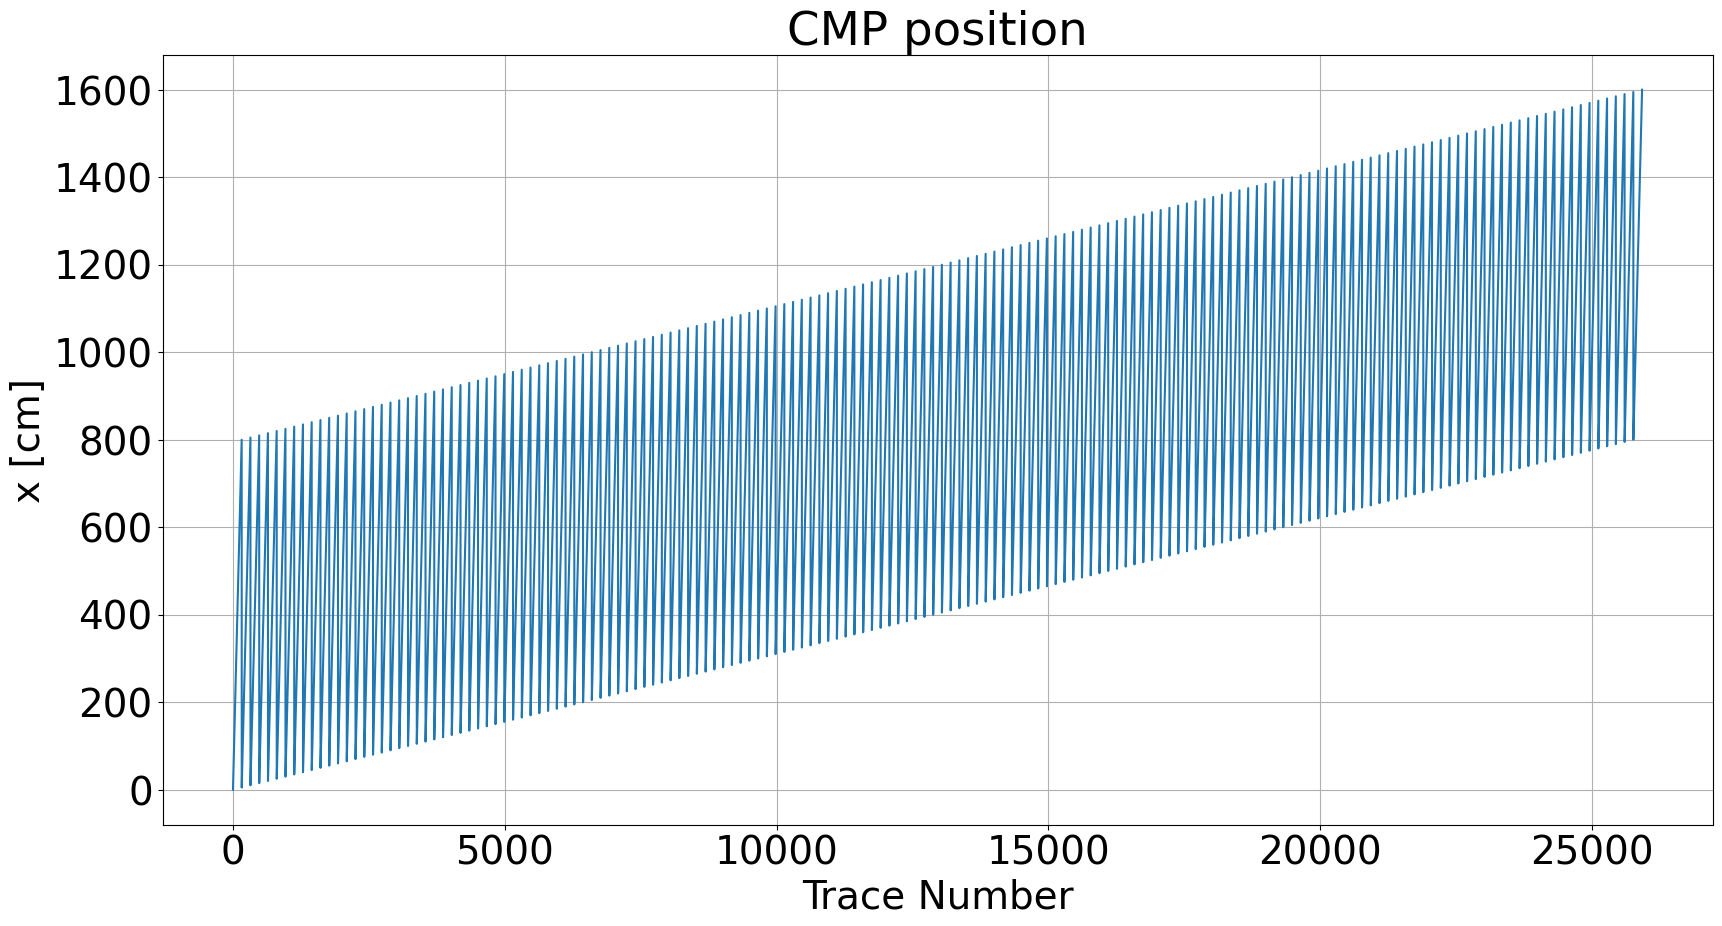

In [85]:
# CMP is a field equivalent to a integer that identifies the Common Midpoint Position (CMP) [cm]
CMP = s.attributes(181)[:]
print("CMP is a vector that looks like: ", CMP)
plt.figure(figsize=[20, 10])
plt.title("CMP position")
plt.xlabel("Trace Number")
plt.ylabel("x [cm]")
plt.grid(True)
plt.plot(CMP)

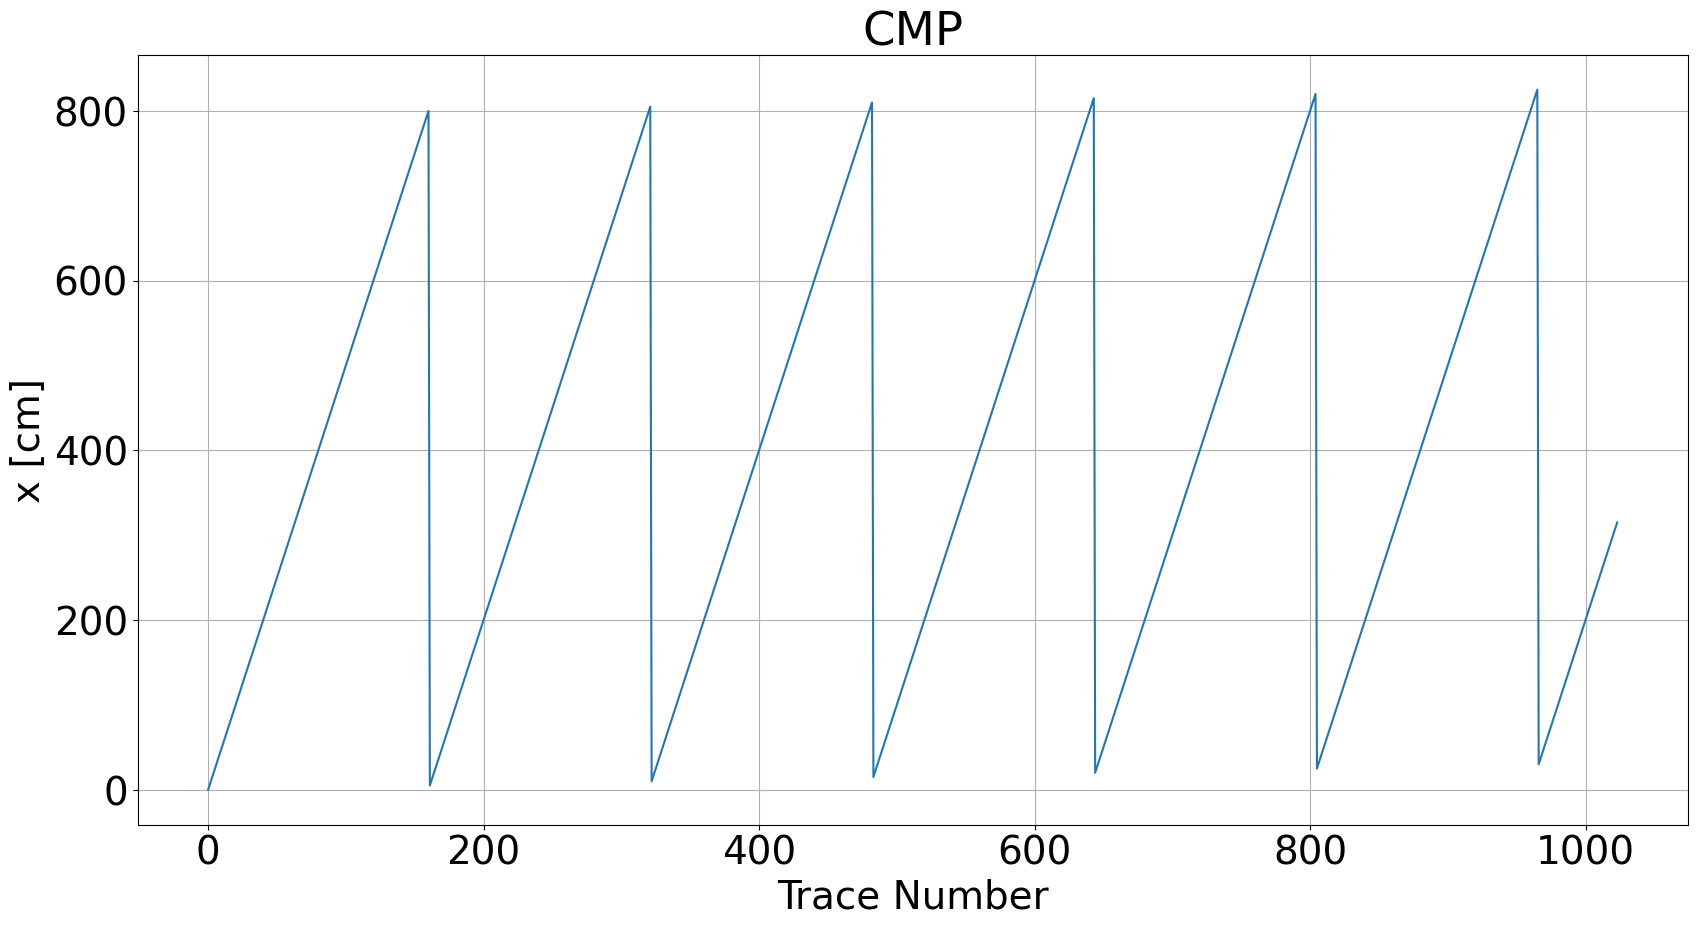

In [86]:
# zoom on CMP: one shot has 161 recorders and CMP position moves accordingly to the described geometry
plt.figure(figsize=[20, 10])
plt.title("CMP")
plt.xlabel("Trace Number")
plt.ylabel("x [cm]")
plt.grid(True)
plt.plot(CMP[:1024])